# 911 Calls analysis - Project

For this capstone project I will be analyzing some 911 call data from Kaggle.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB



# Presenting basic information

The top 5 zipcodes for 911 calls

In [9]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The top 5 townships (twp) for 911 calls

In [10]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

The amount of unique title codes

In [11]:
df['title'].nunique()

110

In [13]:
#creating an additional column, which will help to represent the reason of call
x = df['title'].iloc[0]
x.split(':')[0]
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

The amount of particular reasons of the calls

In [14]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

The amount of particular reasons of the calls presented in a plot

<Axes: xlabel='Reason', ylabel='count'>

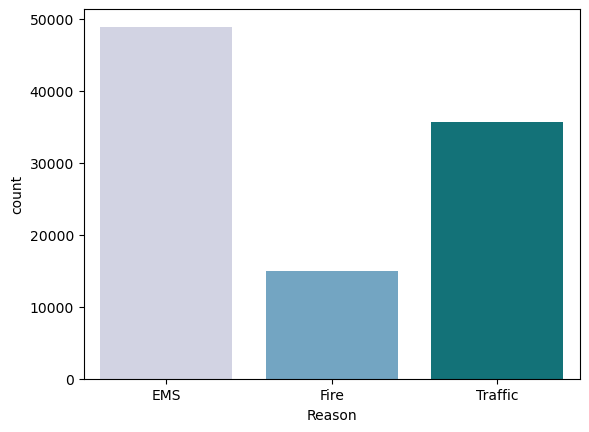

In [15]:
sns.countplot(data=df,x=df['Reason'],palette='PuBuGn')

Analysing particular time of the calls by creating helpful columns

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
#additionally for better presentation I alternated the Day of Week column
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

A countplot representing the dependence of Day of the Week and the Reason of the call

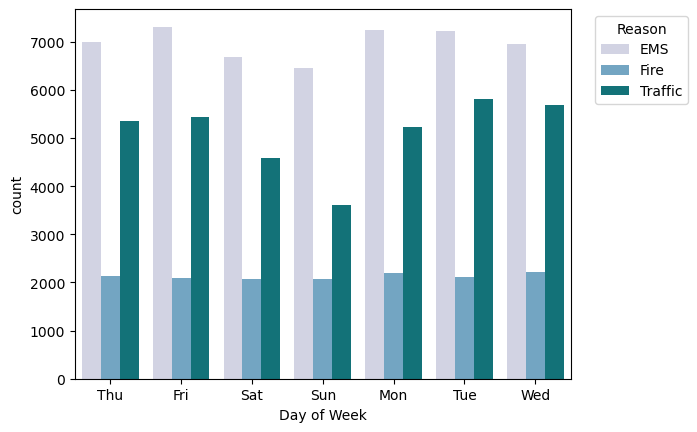

In [18]:
plot = sns.countplot(data=df,x=df['Day of Week'],hue=df['Reason'],palette='PuBuGn')
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.25, 1))

Representing the dependence of Month and the Reason of the call but there is missing data

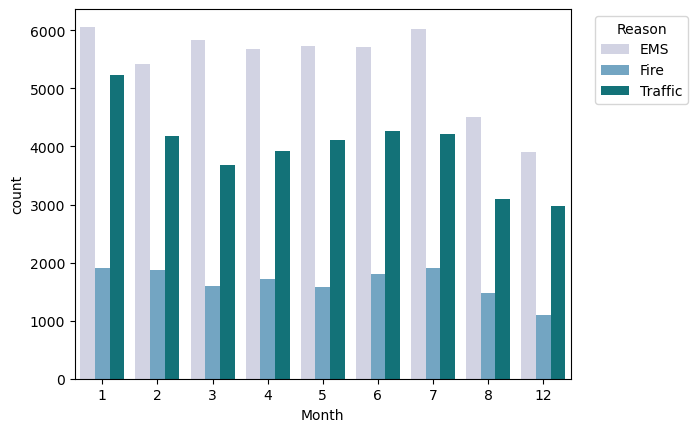

In [19]:
plot_month = sns.countplot(data=df,x=df['Month'],hue=df['Reason'],palette='PuBuGn')
sns.move_legend(plot_month, "upper right", bbox_to_anchor=(1.25, 1))
#there is no data for months 9, 10 and 11

<Axes: xlabel='Month'>

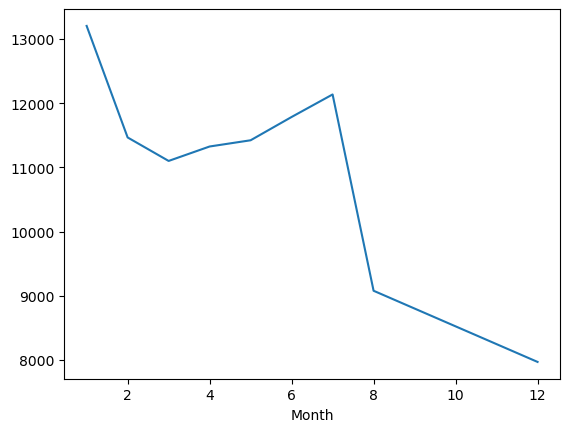

In [20]:
#therefore I fill in this information by plotting the information in another way
#a simple line plot that fills in the missing months
byMonth = df.groupby(df['Month']).count()
byMonth['lat'].plot()

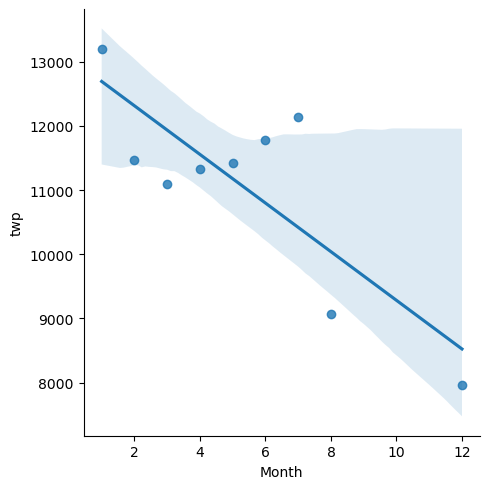

In [21]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

Representing the amount of calls per date

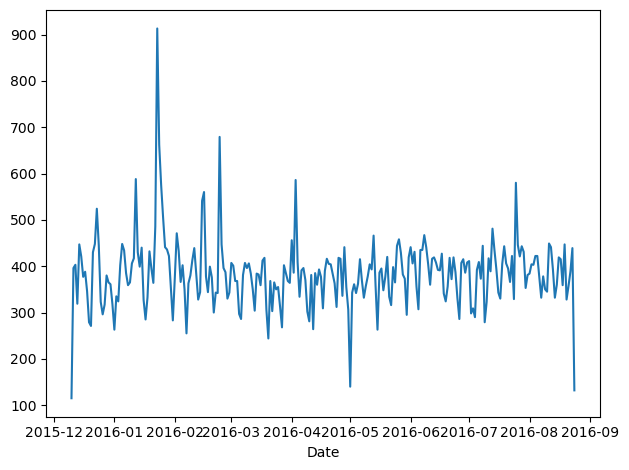

In [22]:
df['Date'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.date())
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Representing the amount of calls depenging on the date and the reason

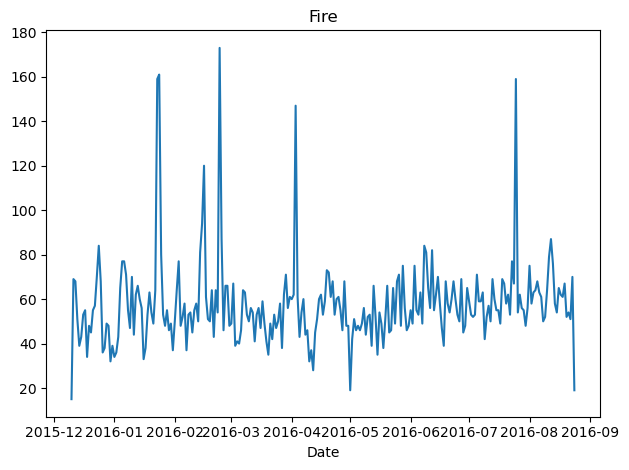

In [32]:
#the reason - Fire
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot() 
plt.title('Fire')
plt.tight_layout()

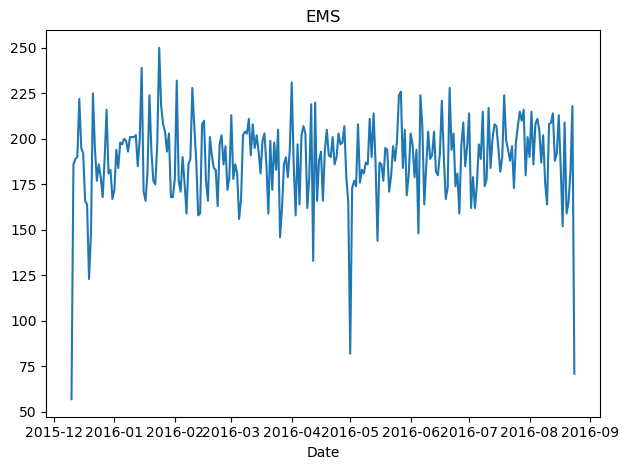

In [33]:
#the reason - EMS
df[df['Reason']=='EMS'].groupby('Date').count()['Reason'].plot() 
plt.title('EMS')
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

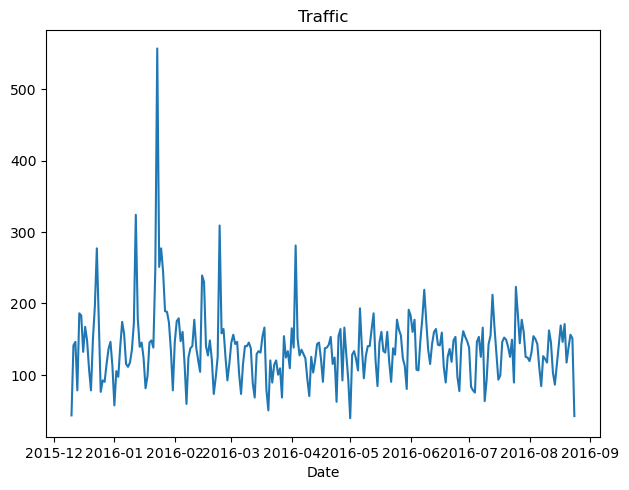

In [34]:
#the reason - treaffic
df[df['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot() 
plt.tight_layout()
plt.title('Traffic')

Heatmap and clustermap representing the codependency of Day of Week, Hour and the number of calls

Text(0.5, 1.0, 'Heatmap - Day of Week and Hour')

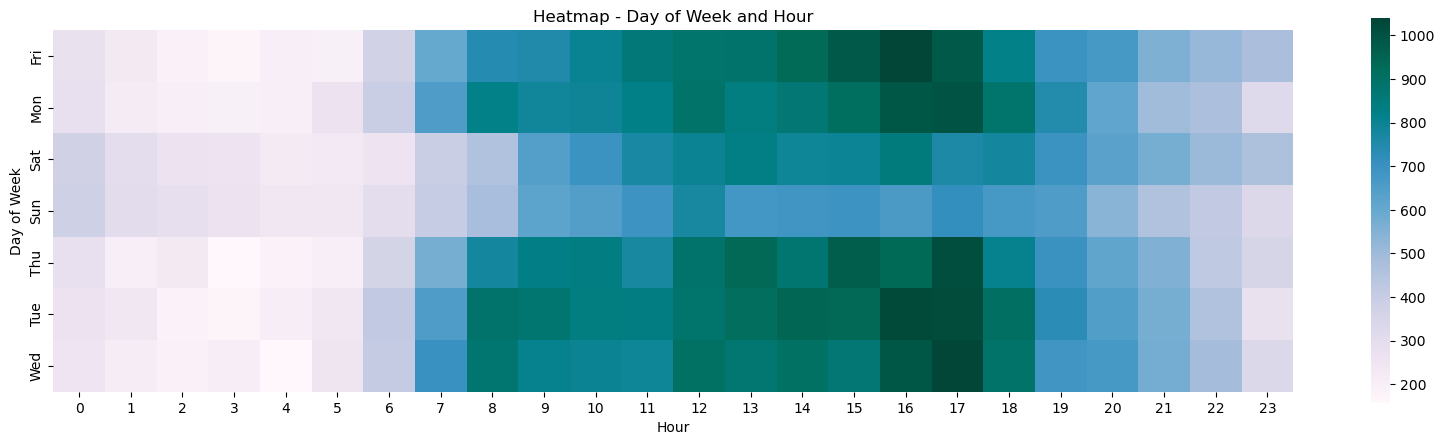

In [37]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
plt.figure(figsize=(20,5))
sns.heatmap(data = dayHour,square=1,cmap='PuBuGn')
plt.title('Heatmap - Day of Week and Hour')

Text(0.5, 1.0, 'Clustermap - Day of Week and Hour')

<Figure size 1000x300 with 0 Axes>

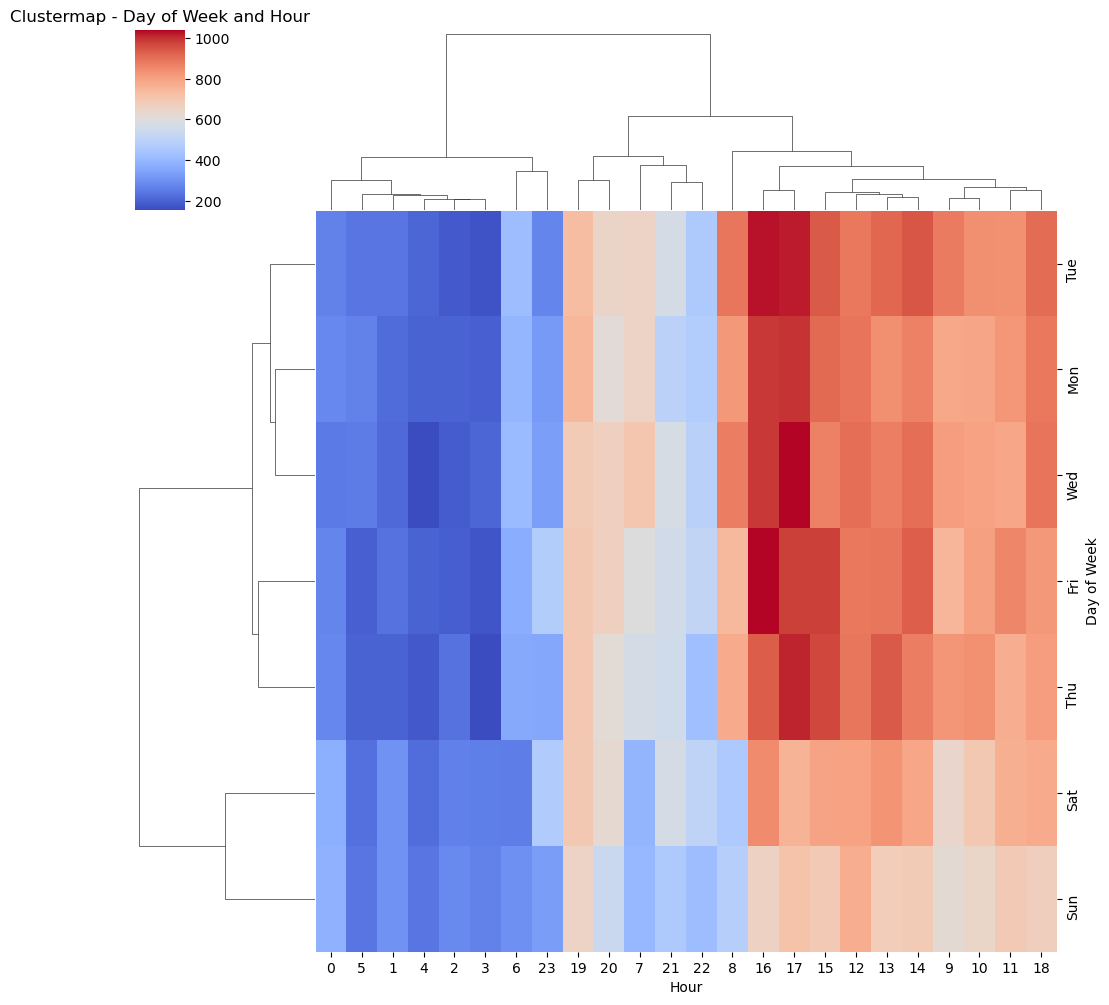

In [44]:
plt.figure(figsize=(10,3))
sns.clustermap(data=dayHour,cmap='coolwarm')
plt.title('Clustermap - Day of Week and Hour')

Heatmap and clustermap representing the codependency of Month, Day of Week and the number of calls

Text(0.5, 1.0, 'Heatmap - Day of Week and Month')

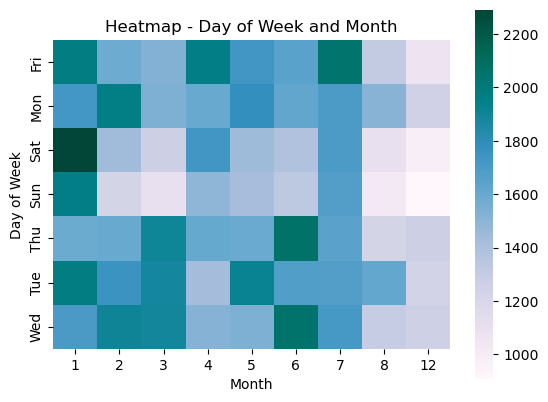

In [51]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
sns.heatmap(dayMonth,cmap='PuBuGn',square=1)
plt.title('Heatmap - Day of Week and Month')

Text(0.5, 1.0, 'Clustermap - Day of Week and Month')

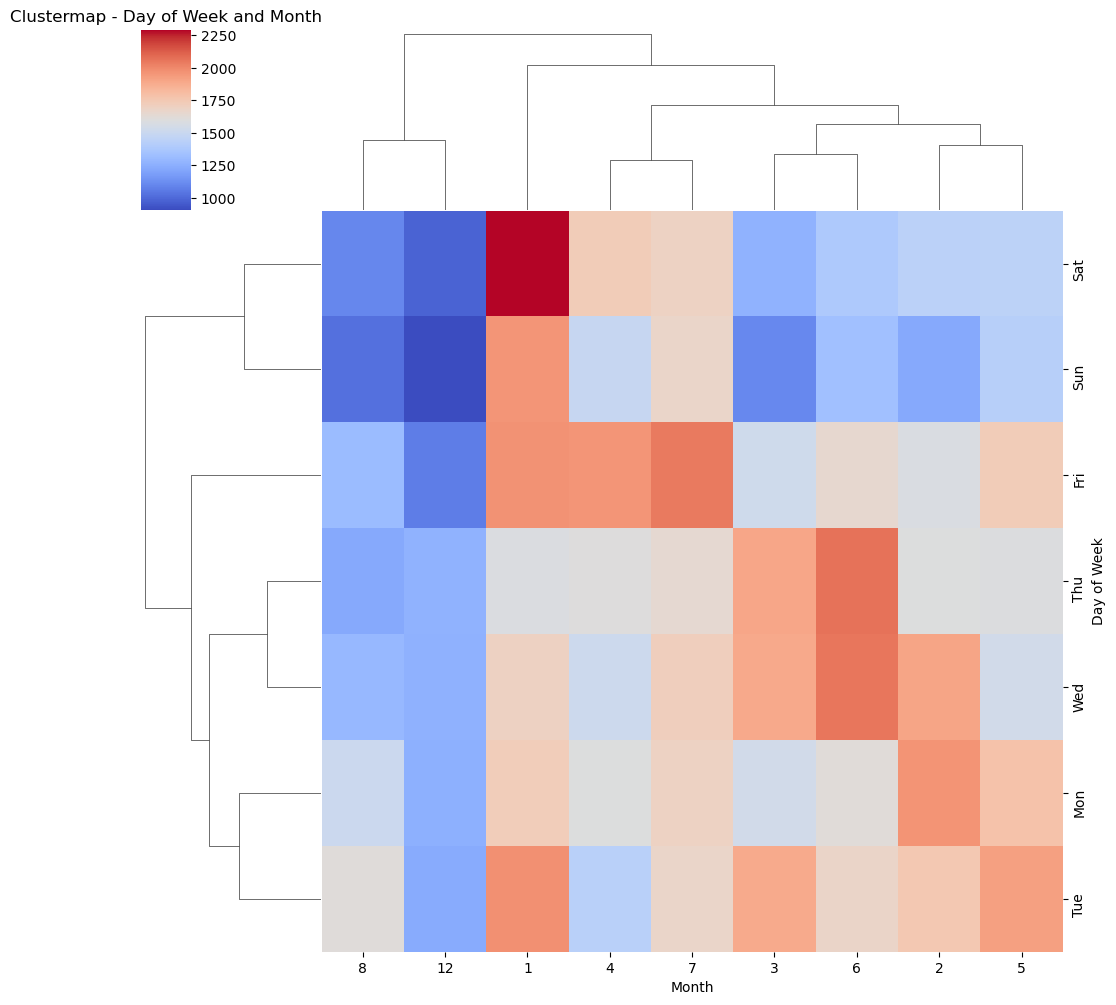

In [52]:
sns.clustermap(dayMonth,cmap='coolwarm')
plt.title('Clustermap - Day of Week and Month')